In [ ]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

with open("../output/1_tracking_results.pkl", "rb") as f:
    df = pickle.load(f)

# Show all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 1) # Set decimal places to 1

print(df)


    frame_id  track_id      x1     y1      x2      y2  confidence
0          0         0  1082.9  492.3  1639.0  1540.0         0.9
1          0         1   256.1  766.8  1405.5  2580.5         0.9
2          0         2  2246.9  462.9  2739.8  1546.8         0.8
3          0         3  2399.3  598.8  2977.5  1973.9         0.8
4          0         4   743.0  547.4  1354.5  1843.7         0.8
5          0         5  2642.8  759.1  3546.0  2665.2         0.7
6          5         0  1080.7  491.4  1631.3  1543.5         0.9
7          5         1   259.3  768.7  1413.6  2600.8         0.9
8          5         2  2244.3  463.5  2738.5  1551.9         0.8
9          5         3  2395.4  602.9  2971.4  1938.7         0.8
10         5         4   737.6  548.0  1351.5  1854.1         0.8
11         5         5  2632.5  736.7  3591.6  2748.3         0.7
12        10         0  1074.5  490.2  1622.1  1547.8         0.9
13        10         1   262.8  767.3  1418.0  2607.3         0.9
14        

Group by each track-id and find out the first and last frame they appeared in


In [ ]:
lifespan = df.groupby('track_id')['frame_id'].agg(['min', 'max']).reset_index()
lifespan


,track_id,min,max
0,0,0,70
1,1,0,70
2,2,0,70
3,3,0,70
4,4,0,70
5,5,0,70
6,6,20,20
7,7,30,30
8,8,45,45
9,9,55,55


In [ ]:
lifespan = lifespan.sort_values(by='min').reset_index(drop=True)
lifespan


,track_id,min,max
0,0,0,70
1,1,0,70
2,2,0,70
3,3,0,70
4,4,0,70
5,5,0,70
6,6,20,20
7,7,30,30
8,8,45,45
9,9,55,55


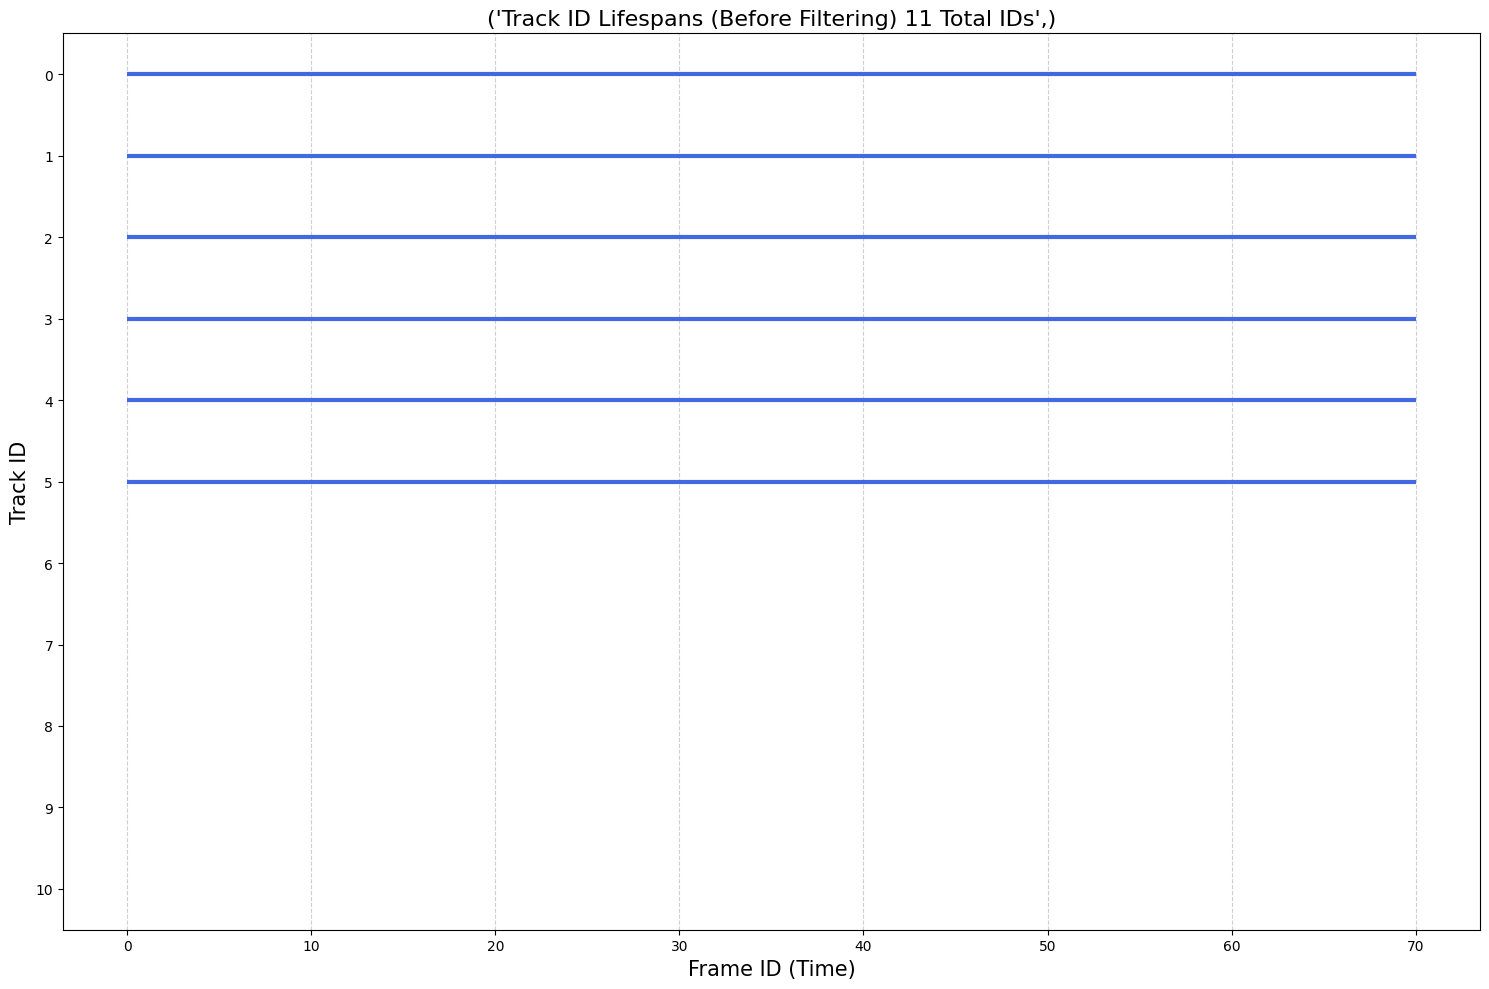

In [18]:
fig, ax = plt.subplots(figsize=(15, 10))

title =f"Track ID Lifespans (Before Filtering) {df['track_id'].nunique()} Total IDs",
# Generate a horizontal line for each track ID
for index, row in lifespan.iterrows():
    ax.hlines(y=index, xmin=row['min'], xmax=row['max'], color='royalblue', lw=3)
    
# 3. Format the plot
# Set the y-ticks to correspond to the plotted line's index,
# but label them with the actual, non-sequential track_id
ax.set_yticks(range(len(lifespan)))
ax.set_yticklabels(lifespan['track_id'])

# Invert the y-axis so the earliest IDs appear at the top
ax.invert_yaxis()

ax.set_title(title, fontsize=16)
ax.set_xlabel("Frame ID (Time)", fontsize=15)
ax.set_ylabel("Track ID", fontsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()


In [24]:
MAX_FRAME_DISTANCE = 150

for end_id, end_row in lifespan.iterrows():
        
        print(end_id)
        print("---")
        print(end_row)
        # Find all tracks that start *after* the current track ends,
        # but *within* the allowed frame distance.
        potential_starts = lifespan[
            (lifespan['min'] > end_row['max']) &
            (lifespan['min'] <= end_row['max'] + MAX_FRAME_DISTANCE)
        ]

print(potential_starts)


0
---
track_id     0
min          0
max         70
Name: 0, dtype: int64
1
---
track_id     1
min          0
max         70
Name: 1, dtype: int64
2
---
track_id     2
min          0
max         70
Name: 2, dtype: int64
3
---
track_id     3
min          0
max         70
Name: 3, dtype: int64
4
---
track_id     4
min          0
max         70
Name: 4, dtype: int64
5
---
track_id     5
min          0
max         70
Name: 5, dtype: int64
6
---
track_id     6
min         20
max         20
Name: 6, dtype: int64
7
---
track_id     7
min         30
max         30
Name: 7, dtype: int64
8
---
track_id     8
min         45
max         45
Name: 8, dtype: int64
9
---
track_id     9
min         55
max         55
Name: 9, dtype: int64
10
---
track_id    10
min         60
max         60
Name: 10, dtype: int64
Empty DataFrame
Columns: [track_id, min, max]
Index: []
